In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
#mpdi = np.loadtxt("regional.out")
mpdi = np.loadtxt("RMPD40W30E.out")
position = np.loadtxt("postion5yearrunni65.out")
#PE = np.loadtxt("P-Enewnew.out")
#PEmean = np.nanmean(PE)
PE = np.loadtxt("resultrainsnow.out")
PEmean = np.nanmean(PE)
########################
#NET = np.loadtxt("NET.out")
EVA = np.loadtxt("resultevacocean.out")
EVAcoupler =  np.loadtxt("evapcoupler.out")
#P65 = np.loadtxt("P65.out")
P65 = np.loadtxt("RMPD40W30E65.out")
P65mean = np.nanmean(P65)
curl  = np.loadtxt("windcurlsmallerregion.out")
curlmean = np.nanmean(curl)

WG = np.loadtxt("PPMyear1.out")
WGmean = np.nanmean(WG)

#SSS = np.loadtxt("SSSnew350.out")
SSS = np.loadtxt("dmeanSSSnew.out")
SSSmean = np.nanmean(SSS)

In [3]:
SSS.shape

(350,)

In [4]:
SSS = np.convolve(SSS, np.ones((5,))/5, mode='valid')

In [5]:
#np.savetxt('SSSfore.out',SSS)

In [6]:
PE.shape

(4200,)

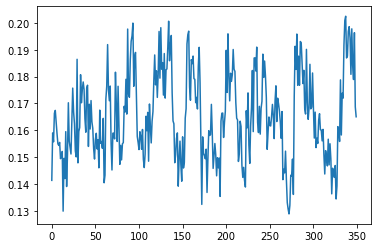

In [7]:
d4 = PE.reshape(350,12)
dmean = np.nanmean(d4,axis=1)
plt.plot(dmean)
PE = np.convolve(dmean, np.ones((5,))/5, mode='valid')

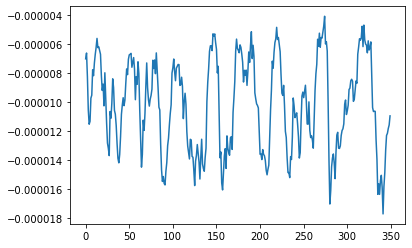

In [8]:
d4net = EVA.reshape(350,12)
dmeannet = np.nanmean(d4net,axis=1)
plt.plot(dmeannet)
eva = np.convolve(dmeannet, np.ones((5,))/5, mode='valid')

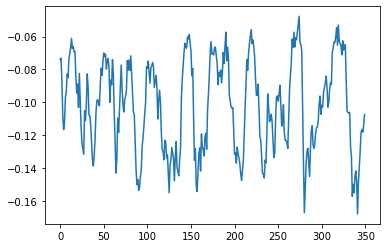

In [9]:
d4netco = EVAcoupler.reshape(350,12)
dmeannetco = np.nanmean(d4netco,axis=1)
plt.plot(dmeannetco)
evaco = np.convolve(dmeannetco, np.ones((5,))/5, mode='valid')

In [10]:
np.savetxt('totalla.out',PE)

In [14]:
wspxx = np.loadtxt("wspxx2new.out")
mrpxx = np.loadtxt("mrpxx2.out")
#arpxx = np.loadtxt("arpxx2.out")
t = np.arange(2,348,1)

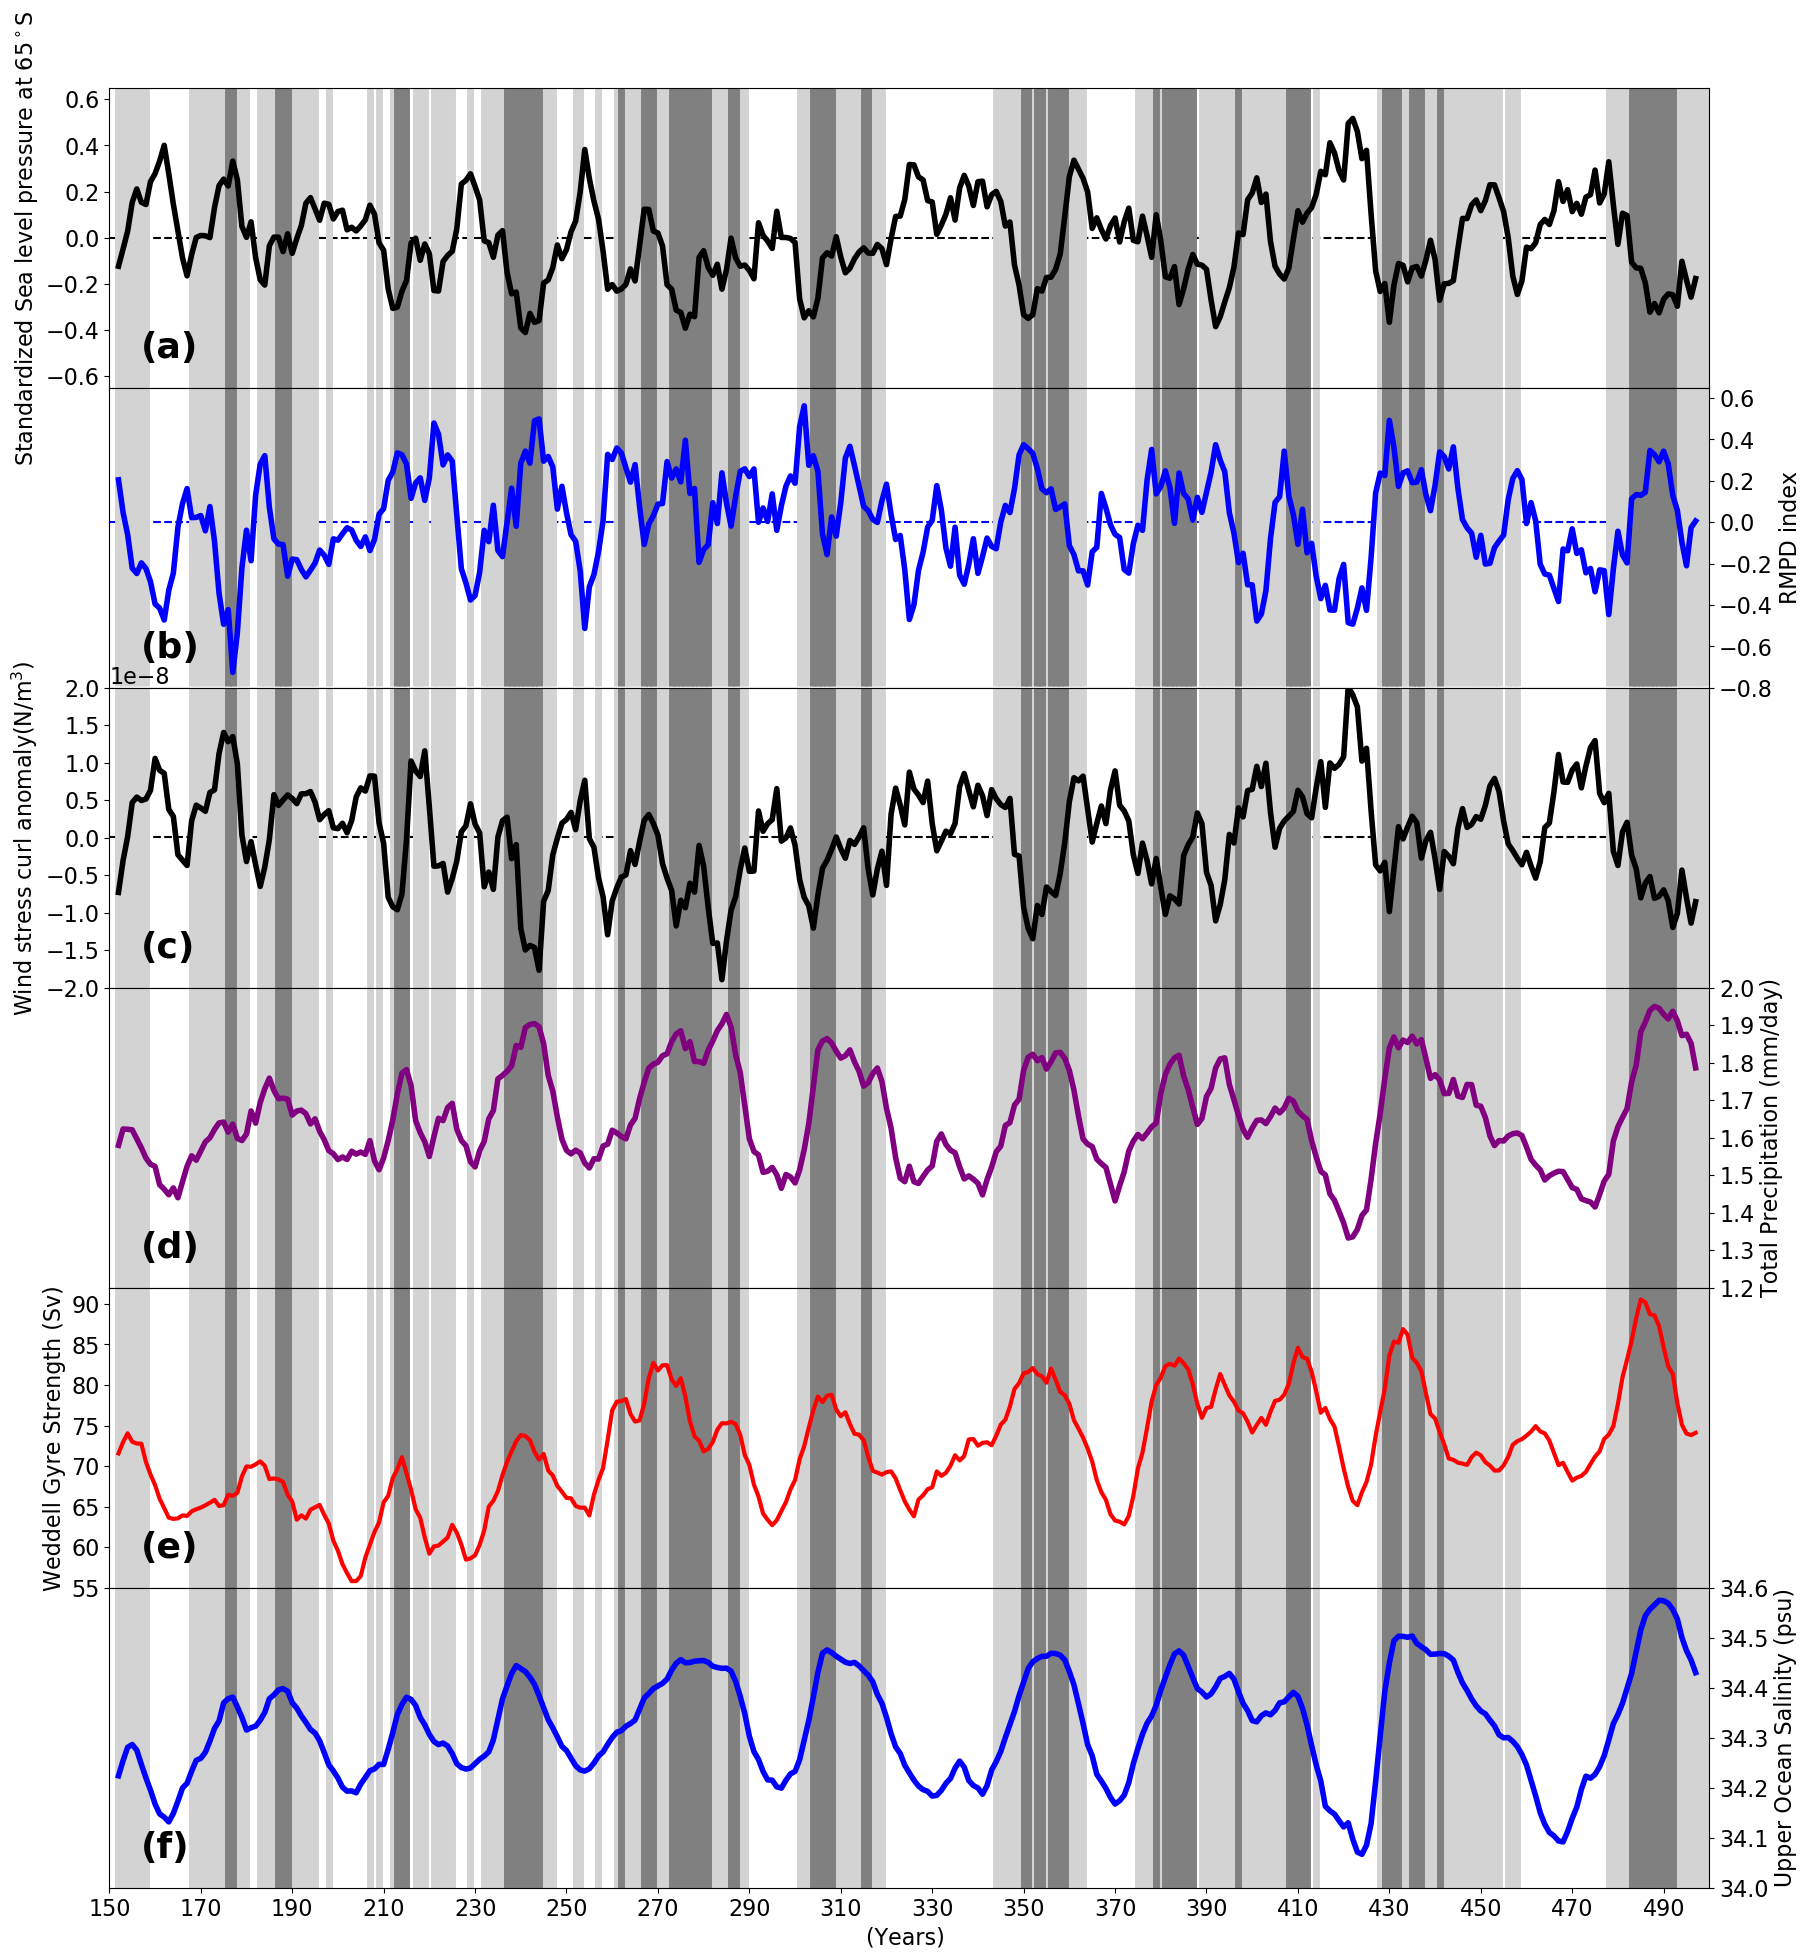

In [15]:
#t = np.arange(0,4176,12)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,20), dpi=100)
################################################################
ax1 = fig.add_axes([0.1, 0.9, 0.8, 0.15],
                    xticklabels=[])


ax1.plot(t,-P65,'black',linewidth=4)
plt.hlines(0, 0, 350, colors = "black",linestyles = "dashed")
#ax2.fill_between(t,P65mean,P65,where=P65 < 0,facecolor='purple', alpha=1)
#plt.vlines(arpxx, , 0.65, colors = "lightgrey",linewidth=5)
plt.vlines(mrpxx, -0.79, 0.65, colors = "lightgrey",linewidth=5)
plt.vlines(wspxx, -0.79, 0.65, colors = "grey",linewidth=5)
plt.yticks(**my_font)
plt.ylabel('Standardized Sea level pressure at 65$^\circ$S',color= 'black',**my_font)
ax1.set(ylim=(-0.65, 0.65),xlim=(0, 350))
plt.yticks(**my_font)

xxx = np.arange(-0.8,0.6,0.2)
ax1.text(0.02, 0.1, '(a)', transform=ax1.transAxes,size=26, weight='bold')
#plt.title('(a)', fontsize=25)
###########################################
ax2 = fig.add_axes([0.1, 0.75, 0.8, 0.15],
                   xticklabels=[])

ax2.plot(t,mpdi,'blue',linewidth=4)
plt.hlines(0, 0, 350, colors = "blue",linestyles = "dashed")
#ax1.fill_between(t,0,mpdi,where=mpdi < 0,facecolor='red', alpha=1)
#plt.vlines(arpxx, 0, 0.65, colors = "lightgrey",linewidth=5)
plt.vlines(mrpxx, -0.79, 0.65, colors = "lightgrey",linewidth=5)
plt.vlines(wspxx, -0.79, 0.65, colors = "grey",linewidth=5)
plt.yticks(**my_font)
plt.ylabel('RMPD index',color= 'black',**my_font)
plt.axis("tight")
ax2.set(ylim=(-0.8, 0.65),xlim=(0, 350))
ax2.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('right')
plt.yticks(**my_font)

#plt.yticks(xxx, ('0.8','0.6','','0.4','','0.2','','0','','-0.2','','-0.4','','-0.6'),**my_font)
#plt.yticks(xxx, ('','0.6','0.4','0.2','0','--0.2','-0.4','-0.6','-0.8'),**my_font)
#ax2.yaxis.get_offset_text().set_fontsize(16)
#plt.gca().invert_yaxis()
ax2.text(0.02, 0.1, '(b)', transform=ax2.transAxes,size=26, weight='bold')
#####################################################################
#ax3 = fig.add_axes([0.1, 0.6, 0.8, 0.15],
                   #xticklabels=[])

#plt.vlines(arpxx, PEmean*3600*24*100/997, 0.000005*3600*24*100/997,colors = "lightgrey",linewidth=5)
#plt.vlines(mrpxx, -52.5,-49, colors = "lightgrey",linewidth=5)
#plt.vlines(wspxx, -52.5,-49, colors = "grey",linewidth=5)
#ax3.plot(t,position,'purple',linewidth=4)
#ax3.fill_between(t,PE,PEmean,where=PEmean > PE,facecolor='green', alpha=1)
#plt.hlines(PEmean*3600*24*100/997, 0, 350, colors = "purple",linestyles = "dashed")
#plt.ylabel('Position of the biggest westerlies ($^\circ$S)',**my_font)
#ax3.set(ylim=(-52.5,-49),xlim=(0, 350))
#ax3.yaxis.get_major_formatter().set_powerlimits((0,1))
#ax3.yaxis.get_offset_text().set_fontsize(16)
#plt.yticks(**my_font)
#plt.title('(c)', fontsize=25)


###################################################
ax3 = fig.add_axes([0.1, 0.6, 0.8, 0.15],
                   xticklabels=[],ylim=(-0.000000011, 0.0000000085))

ax3.plot(t,0.001*curl,'black',linewidth=4)
plt.hlines(0.001*curlmean, 0, 350, colors = "black",linestyles = "dashed")
#ax4.fill_between(t,0.001*curlmean,0.001*curl,where=curl < curlmean,facecolor='purple', alpha=1)
ax3.set(ylim=(-0.00000002, 0.00000002),xlim=(0, 350))
#plt.vlines(arpxx, 0, 0.0000000085, colors = "lightgrey",linewidth=5)
plt.vlines(mrpxx, -0.00000002, 0.00000002, colors = "lightgrey",linewidth=5)
plt.vlines(wspxx, -0.00000002, 0.00000002, colors = "grey",linewidth=5)
plt.ylabel('Wind stress curl anomaly(N/m$^3$)',color= 'black',**my_font)
ax3.yaxis.get_offset_text().set_fontsize(16)
#ax4.yaxis.set_label_position('right')
#ax4.yaxis.set_ticks_position('right')
plt.yticks(**my_font)
ax3.text(0.02, 0.1, '(c)', transform=ax3.transAxes,size=26, weight='bold')
##########################################################################################
ax4 = fig.add_axes([0.1, 0.45, 0.8, 0.15],
                   xticklabels=[])

#plt.vlines(arpxx, PEmean*3600*24*100/997, 0.000005*3600*24*100/997,colors = "lightgrey",linewidth=5)
plt.vlines(mrpxx, 1,2.2, colors = "lightgrey",linewidth=5)
plt.vlines(wspxx, 1,2.2, colors = "grey",linewidth=5)
ax4.plot(t,PE*10,'purple',linewidth=4)
#ax4.plot(t,-eva*10*3600*24*100/997,'orange',linewidth=3)
#ax4.plot(t,PE*10+eva*10*3600*24*100/997,'darkgreen',linewidth=5)
####ax4.plot(t,-evaco*10,'darkred',linewidth=5)
#####ax4.plot(t,PE*10+evaco*10,'darkgreen',linewidth=5)
#ax3.fill_between(t,PE,PEmean,where=PEmean > PE,facecolor='green', alpha=1)
#plt.hlines(PEmean*3600*24*100/997, 0, 350, colors = "purple",linestyles = "dashed")
plt.ylabel('Total Precipitation (mm/day)',**my_font)
ax4.set(ylim=(1.2,2),xlim=(0, 350))
#ax3.yaxis.get_major_formatter().set_powerlimits((0,1))
ax4.yaxis.get_offset_text().set_fontsize(16)
ax4.yaxis.set_label_position('right')
ax4.yaxis.set_ticks_position('right')
plt.yticks(**my_font)
ax4.text(0.02, 0.1, '(d)', transform=ax4.transAxes,size=26, weight='bold')
########################################

#ax5 = fig.add_axes([0.1, 0.3, 0.8, 0.15],xticklabels=[])

#ax5.plot(t,SSS,'blue',linewidth=4)
#plt.hlines(SSSmean, 0, 350, colors = "purple",linestyles = "dashed")
#ax3.fill_between(t,SSSmean,SSS,where=SSS < SSSmean,facecolor='green', alpha=1)
#plt.yticks(**my_font)
#plt.vlines(arpxx, SSSmean, 34.6, colors = "lightgrey",linewidth=5)
#plt.vlines(mrpxx, 34.33, 34.7, colors = "lightgrey",linewidth=5)
#plt.vlines(wspxx, 34.33, 34.7, colors = "grey",linewidth=5)
#plt.ylabel('Upper Ocean Salinity (psu)',color= 'black',**my_font)
#plt.axis("tight")
#ax5.set(ylim=(34.33, 34.7,),xlim=(0, 350)) 
#ax6.yaxis.set_label_position('right')
#ax6.yaxis.set_ticks_position('right')
#plt.yticks(**my_font)
#plt.title('(e)', fontsize=25)
########################################

ax5 = fig.add_axes([0.1, 0.3, 0.8, 0.15],xticklabels=[])
                   #xlim=(0, 350),ylim=(55, 92))

ax5.plot(t,WG,'red',linewidth=3)
#plt.vlines(arpxx, 55, 92, colors = "lightgrey",linewidth=5)
plt.vlines(mrpxx, 55, 92, colors = "lightgrey",linewidth=5)
plt.vlines(wspxx, 55, 92, colors = "grey",linewidth=5)
plt.yticks(**my_font)
ax5.set(ylim=(55, 92),xlim=(0, 350))
plt.ylabel('Weddell Gyre Strength (Sv)',color= 'black',**my_font)
plt.xlabel('Model Years',**my_font)
#plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490'],**my_font)
#plt.xticks(**my_font)
#ax6.yaxis.get_offset_text().set_fontsize(16)
#ax6.yaxis.set_label_position('right')
#ax6.yaxis.set_ticks_position('right')
plt.yticks(**my_font)
ax5.text(0.02, 0.1, '(e)', transform=ax5.transAxes,size=26, weight='bold')

########################################

ax6 = fig.add_axes([0.1, 0.15, 0.8, 0.15])

ax6.plot(t,SSS,'blue',linewidth=4)
#plt.hlines(SSSmean, 0, 350, colors = "purple",linestyles = "dashed")
#ax3.fill_between(t,SSSmean,SSS,where=SSS < SSSmean,facecolor='green', alpha=1)
#plt.yticks(**my_font)
#plt.vlines(arpxx, SSSmean, 34.6, colors = "lightgrey",linewidth=5)
plt.vlines(mrpxx, 34.0, 34.6, colors = "lightgrey",linewidth=5)
plt.vlines(wspxx, 34.0, 34.6, colors = "grey",linewidth=5)
plt.ylabel('Upper Ocean Salinity (psu)',color= 'black',**my_font)
plt.axis("tight")
ax6.set(ylim=(34.0, 34.6,),xlim=(0, 350)) 
ax6.yaxis.set_label_position('right')
ax6.yaxis.set_ticks_position('right')
plt.yticks(**my_font)
ax6.text(0.02, 0.1, '(f)', transform=ax6.transAxes,size=26, weight='bold')
plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490'],**my_font)
plt.xlabel("(Years) ",**my_font)
plt.xticks(**my_font)
########################################

plt.savefig("allinonenew.png",bbox_inches='tight',dpi=fig.dpi)

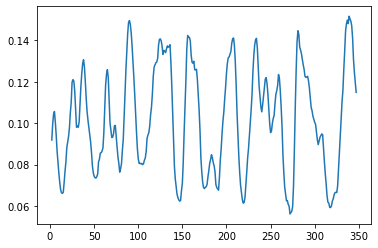

In [14]:
plt.plot(t,-evaco)

In [12]:
mpdi = np.loadtxt("regional.out")
#PE = np.loadtxt("P-Enewnew.out")
#PEmean = np.nanmean(PE)
PE = np.loadtxt("postion5yearrunni65.out")
PEmean = np.nanmean(PE)
P65 = np.loadtxt("P65.out")
P65mean = np.nanmean(P65)
curl  = np.loadtxt("windcurlsmallerregion.out")
curlmean = np.nanmean(curl)

WG = np.loadtxt("PPMyear1.out")
WGmean = np.nanmean(WG)

In [13]:
wspxx = np.loadtxt("wspxx2.out")
mrpxx = np.loadtxt("mrpxx2.out")
#arpxx = np.loadtxt("arpxx2.out")
t = np.arange(2,348,1)

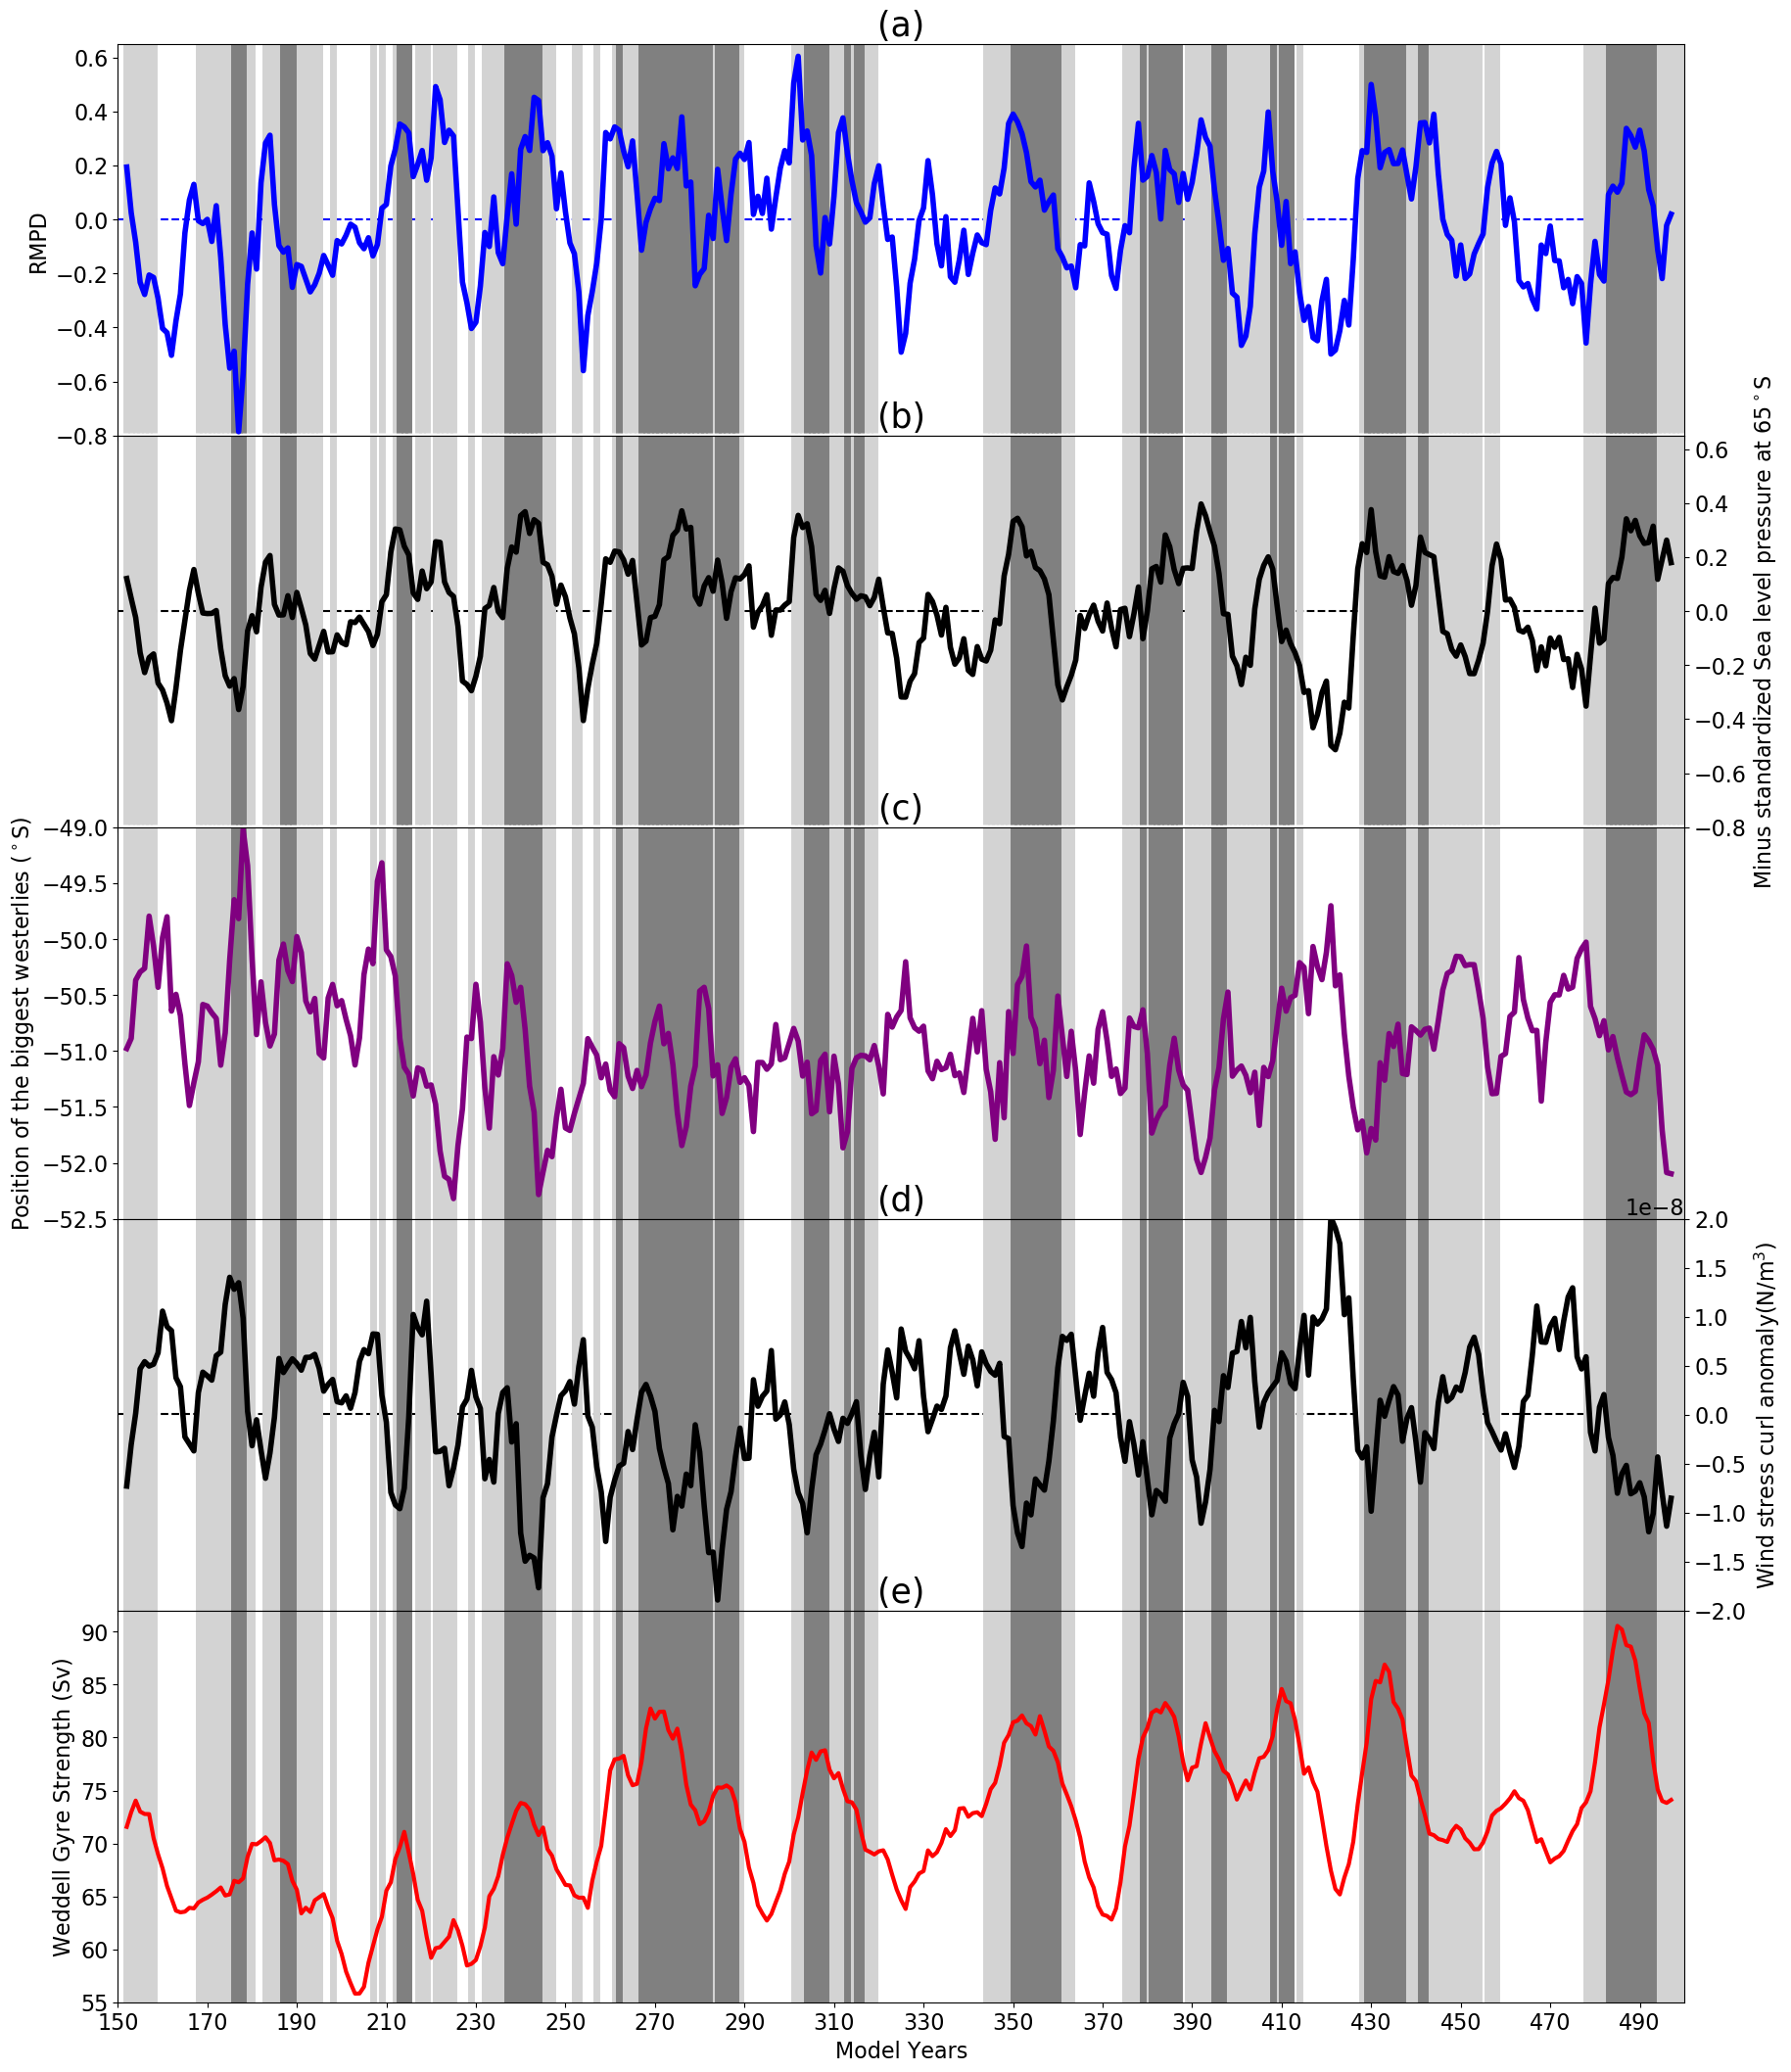

In [14]:
#t = np.arange(0,4176,12)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,20), dpi=100)
################################################################
ax1 = fig.add_axes([0.1, 0.9, 0.8, 0.2],
                    xticklabels=[],ylim=(-0.8, 0.65))
ax1.plot(t,mpdi,'blue',linewidth=4)
plt.hlines(0, 0, 350, colors = "blue",linestyles = "dashed")
#ax1.fill_between(t,0,mpdi,where=mpdi < 0,facecolor='red', alpha=1)
#plt.vlines(arpxx, 0, 0.65, colors = "lightgrey",linewidth=5)
plt.vlines(mrpxx, -0.79, 0.65, colors = "lightgrey",linewidth=5)
plt.vlines(wspxx, -0.79, 0.65, colors = "grey",linewidth=5)
plt.yticks(**my_font)
plt.ylabel('RMPD',color= 'black',**my_font)
plt.axis("tight")
ax1.set(ylim=(-0.8, 0.65),xlim=(0, 350))
plt.yticks(**my_font)
plt.title('(a)', fontsize=25)
###########################################
ax2 = fig.add_axes([0.1, 0.7, 0.8, 0.2],
                   xticklabels=[],ylim=(0, 0.000005))

ax2.plot(t,P65,'black',linewidth=4)
plt.hlines(0, 0, 350, colors = "black",linestyles = "dashed")
#ax2.fill_between(t,P65mean,P65,where=P65 < 0,facecolor='purple', alpha=1)
#plt.vlines(arpxx, , 0.65, colors = "lightgrey",linewidth=5)
plt.vlines(mrpxx, -0.79, 0.65, colors = "lightgrey",linewidth=5)
plt.vlines(wspxx, -0.79, 0.65, colors = "grey",linewidth=5)
plt.yticks(**my_font)
plt.ylabel('Minus standardized Sea level pressure at 65$^\circ$S',color= 'black',**my_font)
ax2.set(ylim=(-0.8, 0.65),xlim=(0, 350))
ax2.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('right')
plt.yticks(**my_font)

xxx = np.arange(-0.8,0.6,0.2)

#plt.yticks(xxx, ('0.8','0.6','','0.4','','0.2','','0','','-0.2','','-0.4','','-0.6'),**my_font)
#plt.yticks(xxx, ('','0.6','0.4','0.2','0','--0.2','-0.4','-0.6','-0.8'),**my_font)
#ax2.yaxis.get_offset_text().set_fontsize(16)
#plt.gca().invert_yaxis()
plt.title('(b)', fontsize=25)
#####################################################################
ax3 = fig.add_axes([0.1, 0.5, 0.8, 0.2],
                   xticklabels=[])

#plt.vlines(arpxx, PEmean*3600*24*100/997, 0.000005*3600*24*100/997,colors = "lightgrey",linewidth=5)
plt.vlines(mrpxx, -52.5,-49, colors = "lightgrey",linewidth=5)
plt.vlines(wspxx, -52.5,-49, colors = "grey",linewidth=5)
ax3.plot(t,PE,'purple',linewidth=4)
#ax3.fill_between(t,PE,PEmean,where=PEmean > PE,facecolor='green', alpha=1)
#plt.hlines(PEmean*3600*24*100/997, 0, 350, colors = "purple",linestyles = "dashed")
plt.ylabel('Position of the biggest westerlies ($^\circ$S)',**my_font)
ax3.set(ylim=(-52.5,-49),xlim=(0, 350))
#ax3.yaxis.get_major_formatter().set_powerlimits((0,1))
ax3.yaxis.get_offset_text().set_fontsize(16)
plt.yticks(**my_font)
plt.title('(c)', fontsize=25)
###################################################
ax4 = fig.add_axes([0.1, 0.3, 0.8, 0.2],
                   xticklabels=[],ylim=(-0.000000011, 0.0000000085))

ax4.plot(t,0.001*curl,'black',linewidth=4)
plt.hlines(0.001*curlmean, 0, 350, colors = "black",linestyles = "dashed")
#ax4.fill_between(t,0.001*curlmean,0.001*curl,where=curl < curlmean,facecolor='purple', alpha=1)
ax4.set(ylim=(-0.00000002, 0.00000002),xlim=(0, 350))
#plt.vlines(arpxx, 0, 0.0000000085, colors = "lightgrey",linewidth=5)
plt.vlines(mrpxx, -0.00000002, 0.00000002, colors = "lightgrey",linewidth=5)
plt.vlines(wspxx, -0.00000002, 0.00000002, colors = "grey",linewidth=5)
plt.ylabel('Wind stress curl anomaly(N/m$^3$)',color= 'black',**my_font)
ax4.yaxis.get_offset_text().set_fontsize(16)
ax4.yaxis.set_label_position('right')
ax4.yaxis.set_ticks_position('right')
plt.yticks(**my_font)
plt.title('(d)', fontsize=25)
##########################################################################################
ax5 = fig.add_axes([0.1, 0.1, 0.8, 0.2],
                   xlim=(0, 350),ylim=(55, 92))
ax5.plot(t,WG,'red',linewidth=3)
#plt.vlines(arpxx, 55, 92, colors = "lightgrey",linewidth=5)
plt.vlines(mrpxx, 55, 92, colors = "lightgrey",linewidth=5)
plt.vlines(wspxx, 55, 92, colors = "grey",linewidth=5)
plt.yticks(**my_font)
ax5.set(ylim=(55, 92),xlim=(0, 350))
plt.ylabel('Weddell Gyre Strength (Sv)',color= 'black',**my_font)
plt.xlabel('Model Years',**my_font)
plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490'],**my_font)
plt.xticks(**my_font)
plt.title('(e)', fontsize=25)
plt.savefig("plottry2.png",bbox_inches='tight',dpi=fig.dpi)